In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [64]:
data=pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [66]:
#checking for null values
data.isnull().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [67]:
#checking for any duplicate entries
data.duplicated().any()

False

C:\Users\Mehul Rajesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


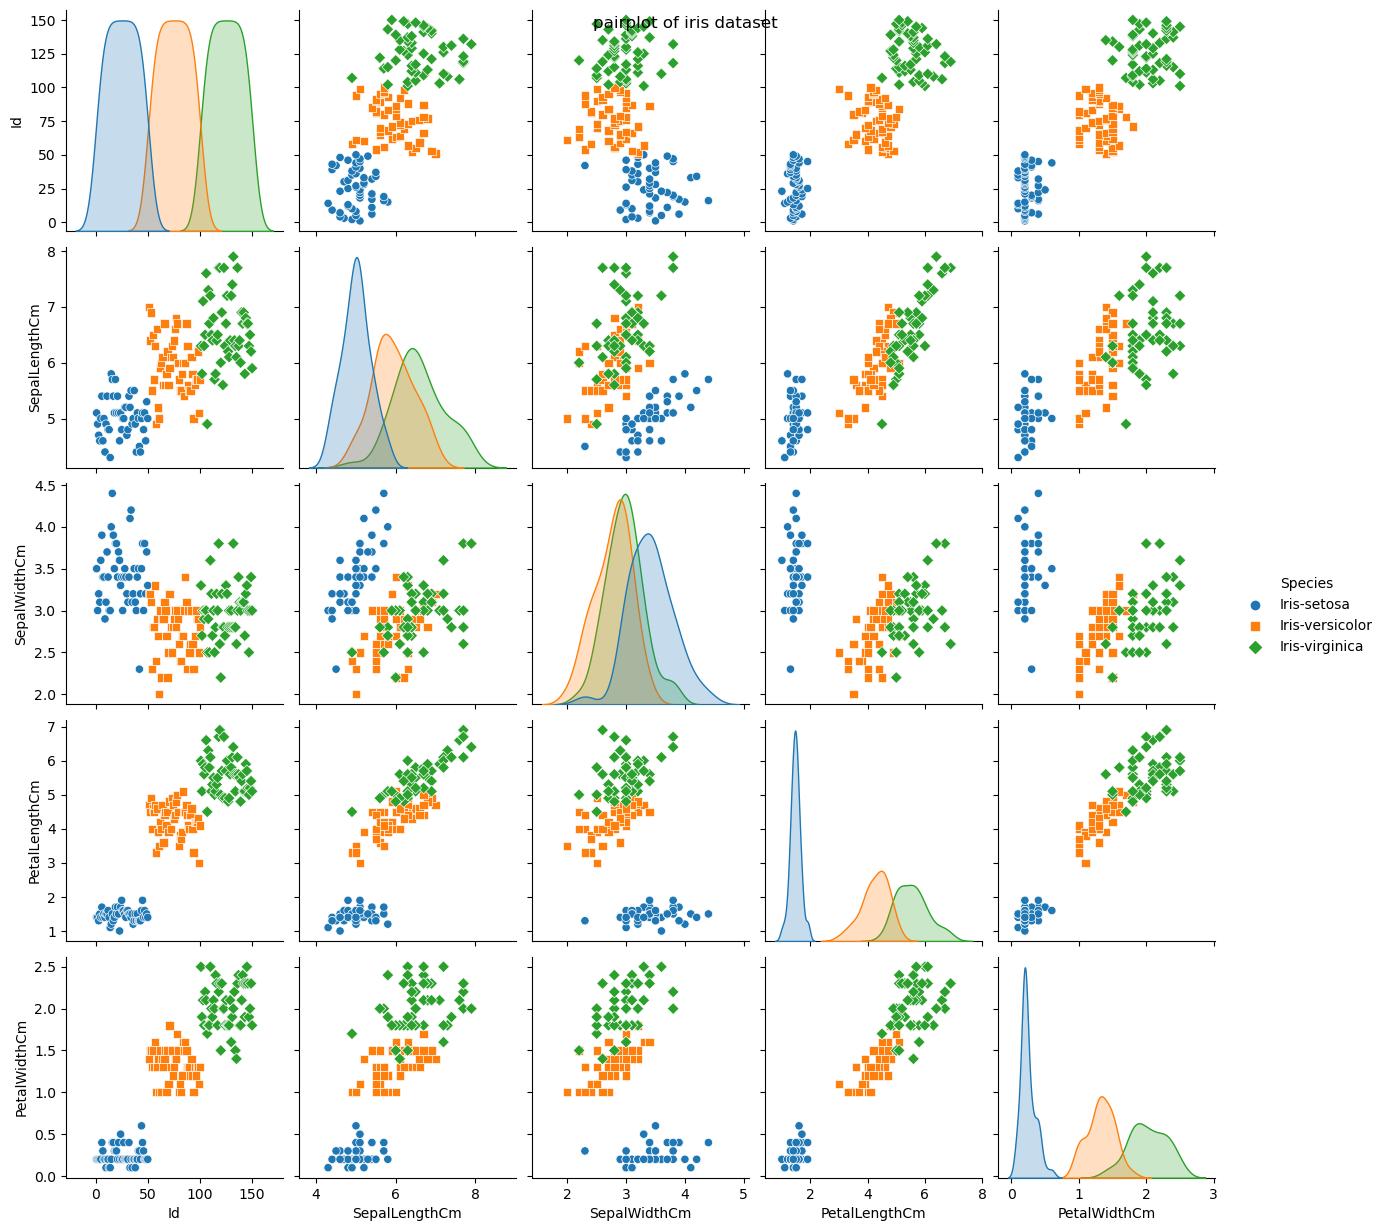

In [68]:
sns.pairplot(data,hue="Species",markers=["o","s","D"])
plt.suptitle("pairplot of iris dataset")
plt.show()

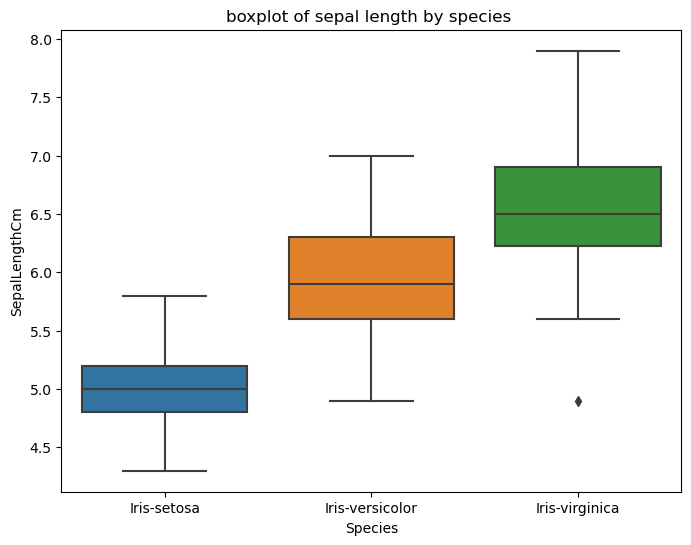

In [69]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Species",y="SepalLengthCm",data=data)
plt.title("boxplot of sepal length by species ")
plt.show()

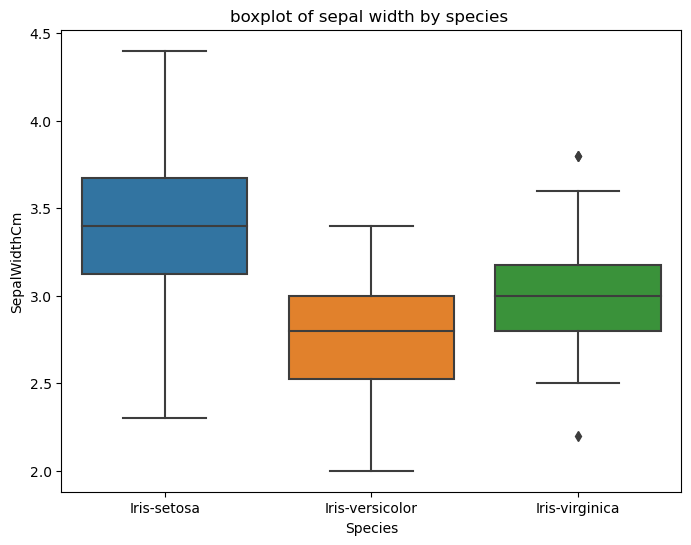

In [70]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Species",y="SepalWidthCm",data=data)
plt.title("boxplot of sepal width by species ")
plt.show()

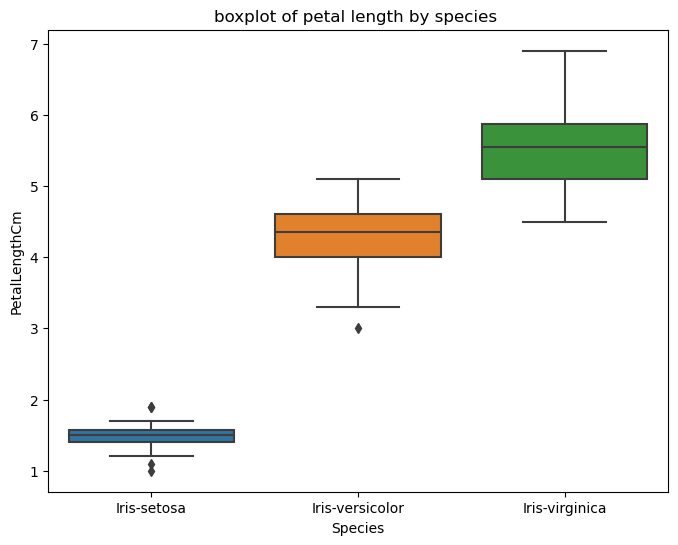

In [71]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Species",y="PetalLengthCm",data=data)
plt.title("boxplot of petal length by species ")
plt.show()

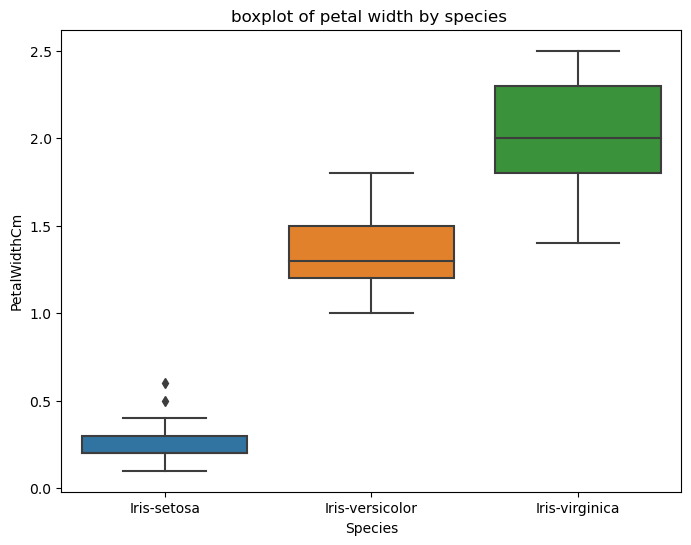

In [72]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Species",y="PetalWidthCm",data=data)
plt.title("boxplot of petal width by species ")
plt.show()

In [73]:
data[data["SepalLengthCm"]>(data["SepalLengthCm"].mean()+3*data["SepalLengthCm"].std())]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [74]:
data[data["PetalLengthCm"]>(data["PetalLengthCm"].mean()+3*data["PetalLengthCm"].std())]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [75]:
data[data["SepalWidthCm"]>(data["SepalWidthCm"].mean()+3*data["SepalWidthCm"].std())] #outliers present

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa


In [76]:
#removing outliers
data=data[data["SepalWidthCm"]<=(data["SepalWidthCm"].mean()+3*data["SepalWidthCm"].std())]

In [77]:
data[data["PetalWidthCm"]>(data["PetalWidthCm"].mean()+3*data["PetalWidthCm"].std())]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [78]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [79]:
encoder=LabelEncoder()
data["Species"]=encoder.fit_transform(data["Species"])

In [80]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [81]:
x=data.iloc[:,1:5]
y=data.iloc[:,5:]

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
classifier=SVC()
classifier.fit(x_train,y_train)

C:\Users\Mehul Rajesh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [84]:
y_pred=classifier.predict(x_test)

In [85]:
accuracyScore=accuracy_score(y_test,y_pred)
print(accuracyScore)

0.9
